# Assignment 17 SVM (Suport Vector Machine)
## Dataset :- SalaryData_Test
### Quick info. about SVM 
#### Info. :-
An SVM is implemented in a slightly different way than other machine learning algorithms. It is capable of performing classification, regression and outlier detection.
Support Vector Machine is a discriminative classifier that is formally designed by a separative hyperplane. It is a representation of examples as points in space that are mapped so that the points of different categories are separated by a gap as wide as possible. In addition to this, an SVM can also perform non-linear classification. Let us take a look at how the Support Vector Machine work.
#### Advantages of SVM
Effective in high dimensional spaces.
Still effective in cases where the number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function that makes it memory efficient.
Different kernel functions can be specified for the decision function that also makes it versatile
#### Disadvantages of SVM
If the number of features is much larger than the number of samples, avoid over-fitting in choosing kernel functions and regularization term is crucial.
SVMs do not directly provide probability estimates, these are calculated using five-fold cross-validation.
#### Fore more info use link 
https://www.edureka.co/blog/support-vector-machine-in-python/

In [25]:
# import req. libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#### loading the data

In [2]:
SalaryData_Test01 = pd.read_csv("D:\Data Science Material\Assignments\SVM\SalaryData_Test.csv")

In [3]:
SalaryData_Test01.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Exploring the dataset

In [4]:
# Simple Statistical measures

SalaryData_Test01.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [5]:
#Let's explore about the data types, null columns, dataset length, rows and columns

SalaryData_Test01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
# Checking data type of each feature

SalaryData_Test01.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

### Data Analysis

In [7]:
SalaryData_Test01.shape  # 15060 rows, 14 in our dataset

(15060, 14)

In [8]:
# chec colsking any null values present in the dataset

SalaryData_Test01.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

there is a no any null values present in the dataset

In [9]:
SalaryData_Test01.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [10]:
# checking details of cols

SalaryData_Test01.workclass.value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [11]:
# checking details of cols

SalaryData_Test01.maritalstatus.value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [12]:
# checking details of cols

SalaryData_Test01.occupation.value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [14]:
# checking details of cols

SalaryData_Test01.relationship.value_counts()

 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: relationship, dtype: int64

In [15]:
# checking details of cols

SalaryData_Test01.race.value_counts()

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

In [16]:
# checking details of cols

SalaryData_Test01.sex.value_counts()

 Male      10147
 Female     4913
Name: sex, dtype: int64

In [17]:
# checking details of cols

SalaryData_Test01.native.value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Dominican-Republic               30
 Japan                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Guatemala                        23
 Jamaica                          23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [18]:
# making duplicate copy of original data safe purpose

SalaryData_Test = SalaryData_Test01.copy()

### Data CLeaning

In [19]:
SalaryData_Test.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


#### Outlier

In [20]:
def count_plot(df, columns):
    plt.figure(figsize=(35, 8))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,2)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = SalaryData_Test.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-p

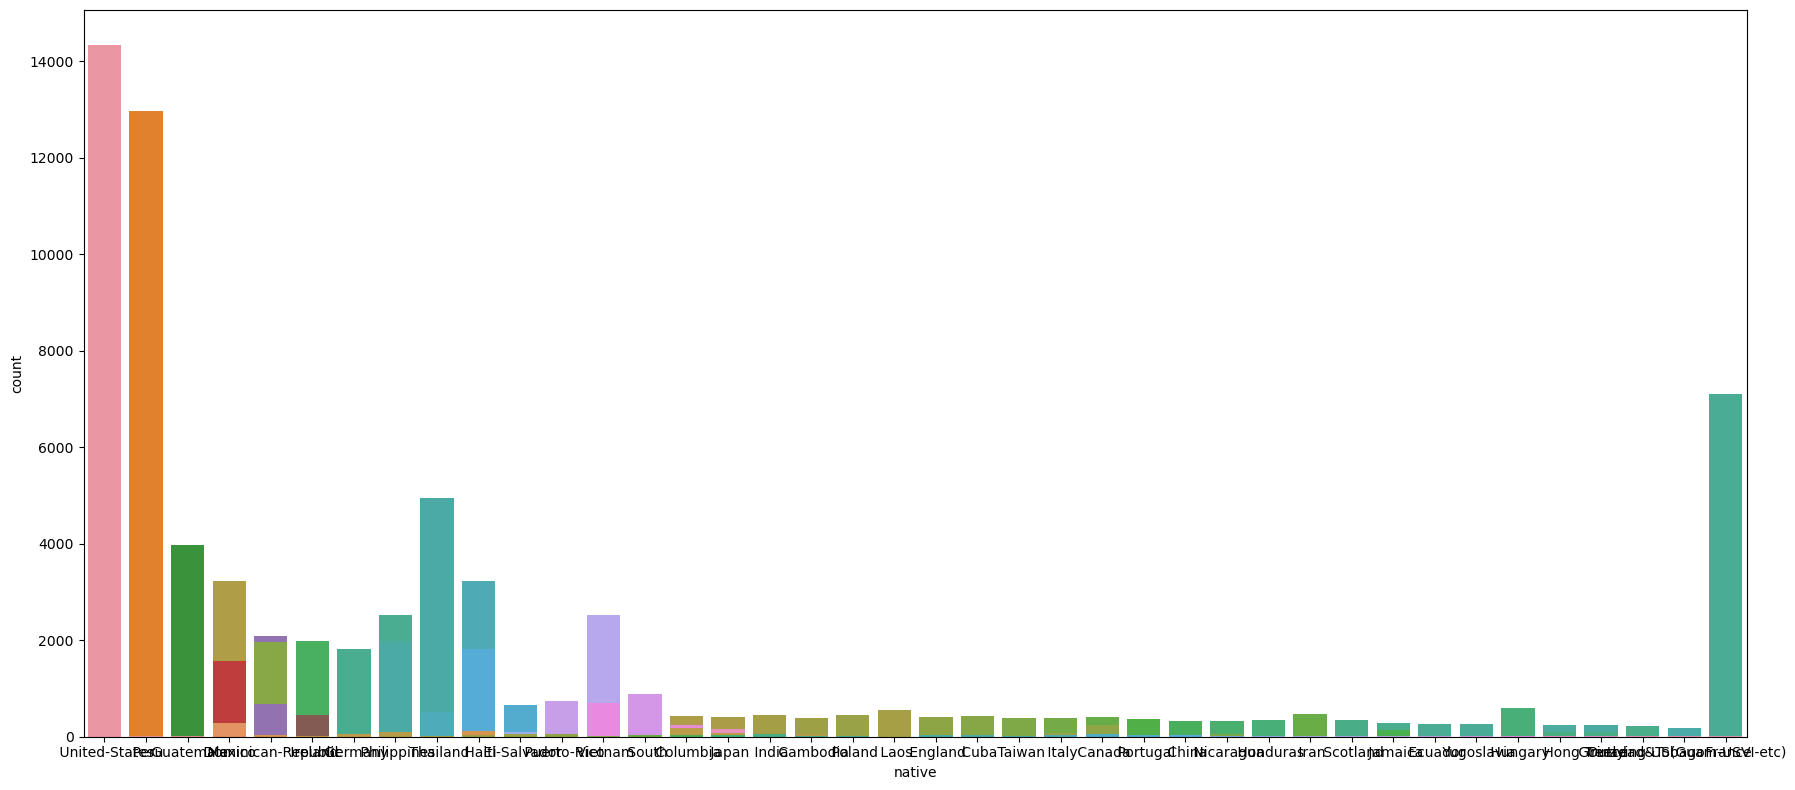

In [23]:
count_plot(SalaryData_Test, features)
plt.show()

In [26]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(SalaryData_Test[features])
SalaryData_Test_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[ 8.,  2.,  1., ...,  0., 39., 37.],
       [21.,  2., 11., ...,  0., 49., 37.],
       [11.,  1.,  7., ...,  0., 39., 37.],
       ...,
       [21.,  2.,  9., ...,  0., 49., 37.],
       [27.,  2.,  9., ...,  0., 39., 37.],
       [18.,  3.,  9., ...,  0., 59., 37.]])

In [27]:
#LebelEncoder - Encode target labels with value between 0 and n_classes-1. 
# This transformer should be used to encode target values, i.e. y, and not the input X.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(SalaryData_Test['Salary'])
SalaryData_Test_encoded['Salary'] = target_encoded
encoder.inverse_transform(target_encoded)

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [28]:
SalaryData_Test_encoded.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8.0,2.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,37.0,0
1,21.0,2.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,37.0,0
2,11.0,1.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,37.0,1
3,27.0,2.0,15.0,9.0,2.0,6.0,0.0,2.0,1.0,87.0,0.0,39.0,37.0,1
4,17.0,2.0,0.0,5.0,4.0,7.0,1.0,4.0,1.0,0.0,0.0,29.0,37.0,0


### Model Building

#### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

X = SalaryData_Test_encoded.drop('Salary',axis=1)  # All independent var in X droping salary cols which is dependent
y = SalaryData_Test_encoded['Salary']   # dependent var in y contain only salary cols

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [52]:
# After spliting data, its shape

X_train.shape , y_train.shape

((10542, 13), (10542,))

In [53]:
# After spliting data, its shape

X_test.shape , y_test.shape

((4518, 13), (4518,))

### Model fitting 

In [54]:
from sklearn import svm
from sklearn.svm import SVC

In [55]:
classifier = svm.SVC(kernel="linear")

In [56]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Evaluating the model

In [63]:
# With this, we can predict how accurately the model or classifier can predict

# So we will calculate the accuracy score, recall, and precision for our evaluation.

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

# Accuracy
print("Accuracy :- ", metrics.accuracy_score(y_test, y_pred))

# precision
print("Precision :- ",metrics.precision_score(y_test, y_pred))

# recall score 
#print("Recall :-", metrics.recall_score(y_test, y_pred))

# classiffication repoort 
print(metrics.classification_report(y_test, y_pred))

Accuracy :-  0.8081009296148738
Precision :-  0.7660098522167488
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      3435
           1       0.77      0.29      0.42      1083

    accuracy                           0.81      4518
   macro avg       0.79      0.63      0.65      4518
weighted avg       0.80      0.81      0.77      4518



### Here we got 81 % Accuracy